In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score,mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
import urllib.request
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [6]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv' 
df = pd.read_csv(url)

In [7]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [9]:
print(df.isnull().sum())

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [40]:
# Prétraitement des données pour le modèle
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)
df_sydney_processed.drop('Date', axis=1, inplace=True)
df_sydney_processed = df_sydney_processed.astype(float)

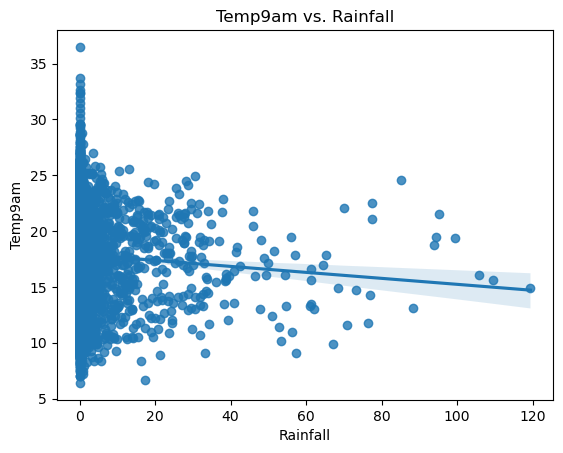

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(data=df,x='Rainfall', y='Temp9am')
plt.xlabel('Rainfall')
plt.ylabel('Temp9am')
plt.title('Temp9am vs. Rainfall')
plt.show()

In [42]:
selected_columns = ['WindGustDir','WindDir3pm']

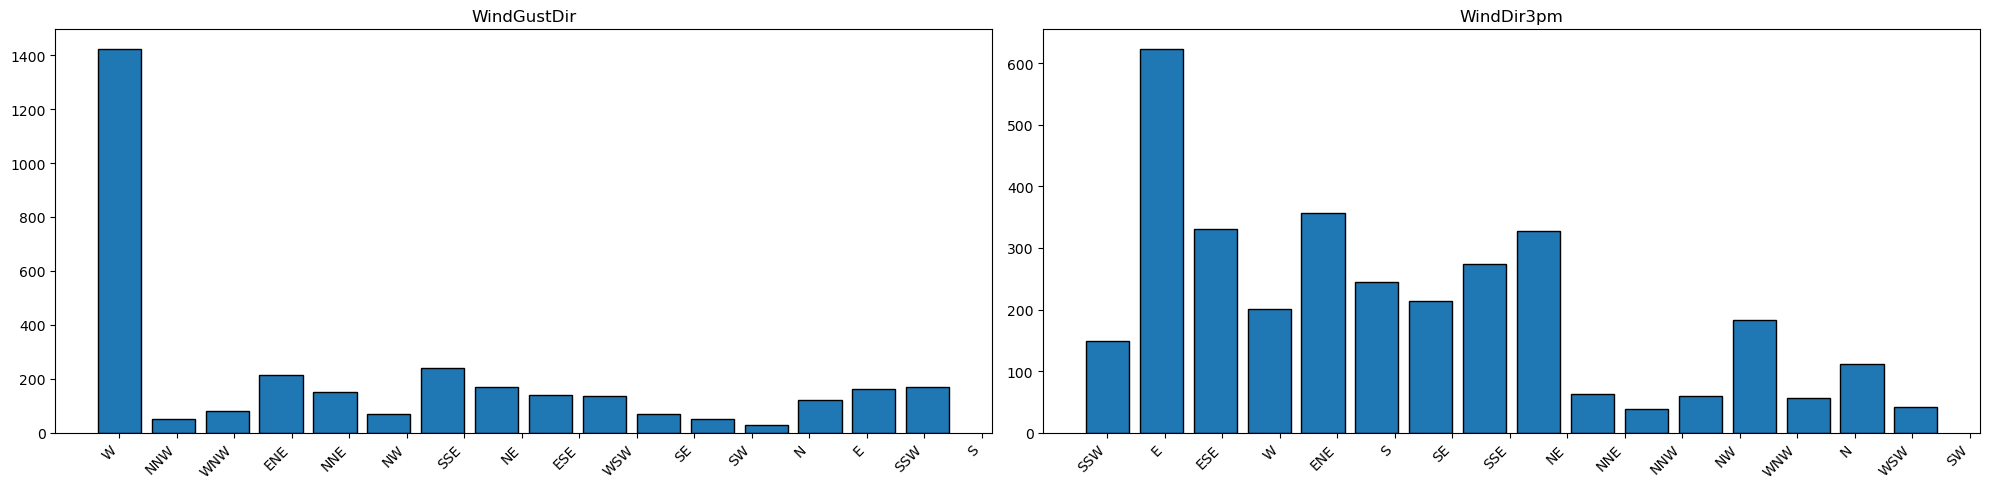

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
for i, col in enumerate(selected_columns):
    categories = df[col].unique()
    axes[i].hist(df[col], bins=len(categories), edgecolor='black', align='left', rwidth=0.8)
    axes[i].set_xticks(range(len(categories)))
    axes[i].set_xticklabels(categories, rotation=45, ha='right')
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [44]:
selected_columns = ['WindGustSpeed']

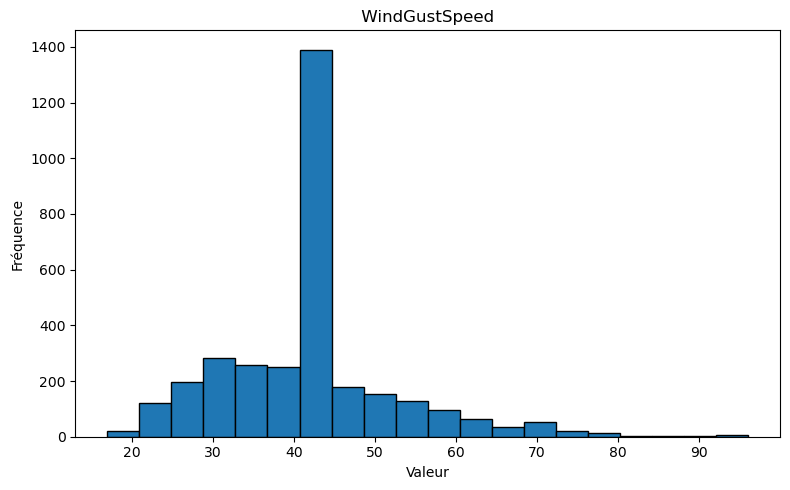

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
bins = 20 
# Histogramme pour blood_glucose_level
ax.hist(df['WindGustSpeed'], bins=bins, edgecolor='black')
ax.set_title(' WindGustSpeed ')
ax.set_xlabel('Valeur')
ax.set_ylabel('Fréquence')
plt.tight_layout()
plt.show()

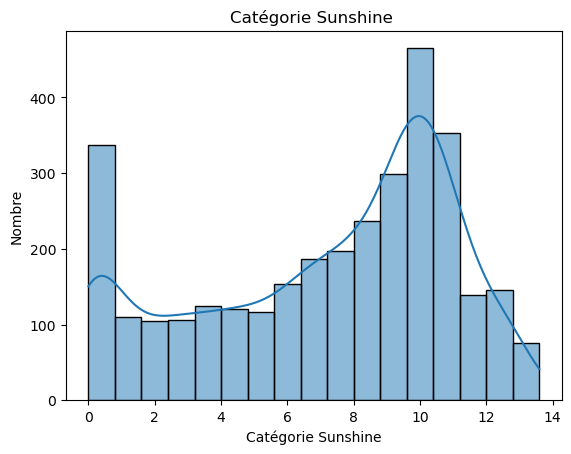

In [46]:
crosstab = sns.histplot(df["Sunshine"], kde=True)
plt.title('Catégorie Sunshine ')
plt.xlabel('Catégorie Sunshine')
plt.ylabel('Nombre')
plt.show()

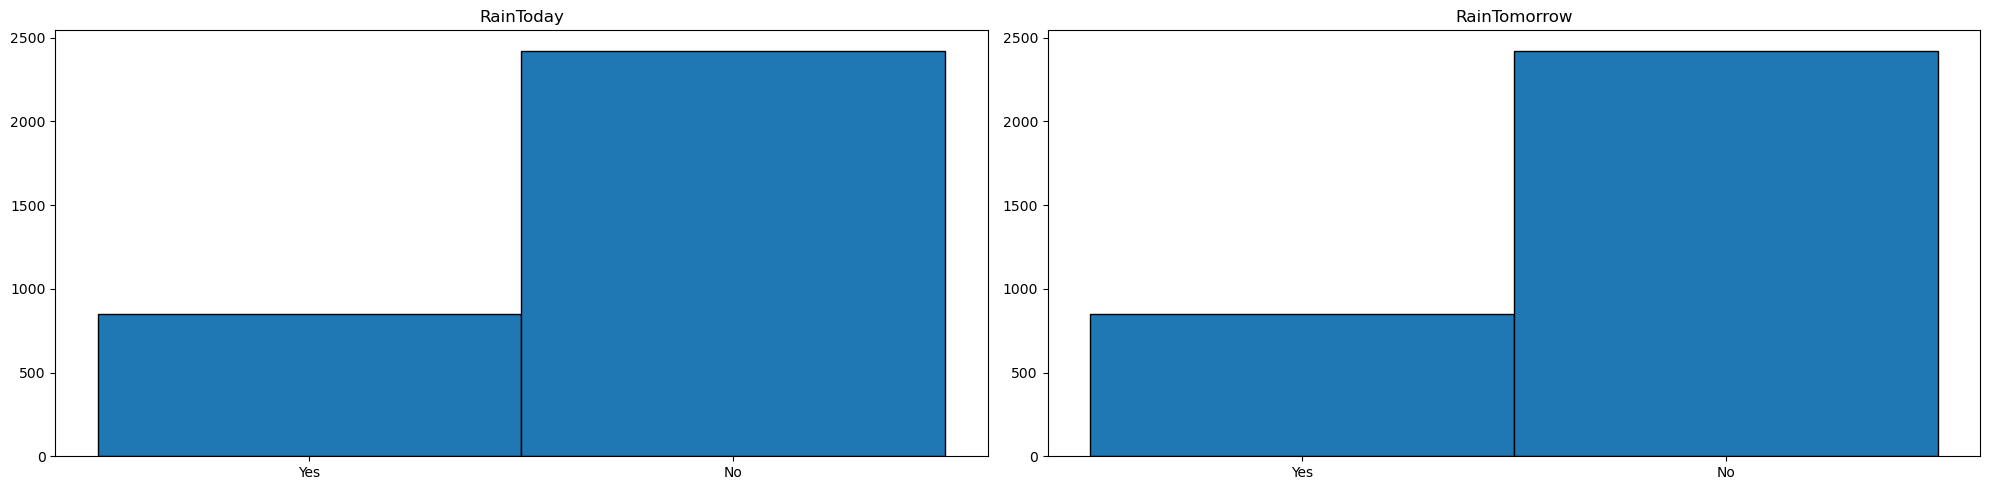

In [47]:
selected_columns_2 = ['RainToday', 'RainTomorrow']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
# Spécification des intervalles pour l'histogramme (0 et 1)
bins = [-0.5, 0.5, 1.5]
# Boucle pour créer les histogrammes pour chaque variable
for i, col in enumerate(selected_columns_2):
    axes[i].hist(df[col], bins=bins, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xticks(['Yes', 'No'])
# Ajustements de la mise en page
plt.tight_layout()
plt.show()

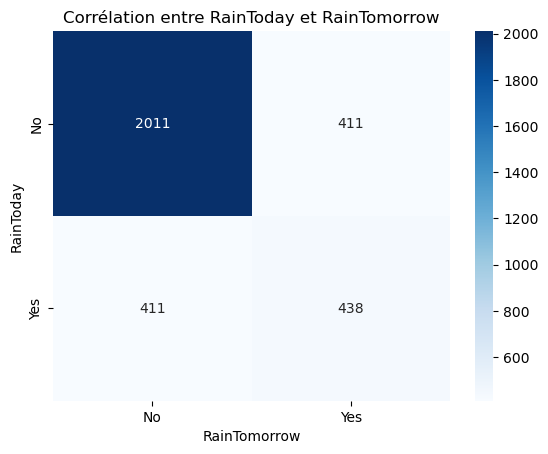

In [48]:
contingency_table = pd.crosstab(df['RainToday'], df['RainTomorrow'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.xlabel('RainTomorrow')
plt.ylabel('RainToday')
plt.title('Corrélation entre RainToday et RainTomorrow')
plt.show()

In [13]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)

In [14]:
Y = df_sydney_processed['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

In [10]:
print("Taille de l'ensemble d'entraînement (X_train, y_train):", X_train.shape, y_train.shape)
print("Taille de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)

Taille de l'ensemble d'entraînement (X_train, y_train): (2616, 66) (2616,)
Taille de l'ensemble de test (X_test, y_test): (655, 66) (655,)


In [11]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)
y_pred = LinearReg.predict(X_test)

In [12]:
# Calcule l'erreur absolue moyenne (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Calcule l'erreur quadratique moyenne (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# Calcule le coefficient de détermination (R2 Score)
r2 = r2_score(y_test, y_pred)

In [13]:
# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R2 Score'],
    'Value': [mae, mse, r2]
})
print("Linear Model Metrics:")
print(results_df)

Linear Model Metrics:
                      Metric     Value
0  Mean Absolute Error (MAE)  0.256319
1   Mean Squared Error (MSE)  0.115722
2                   R2 Score  0.427126


In [14]:
# Calcule la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(LinearReg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Calcule la moyenne des scores pour chaque taille d'ensemble d'entraînement
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

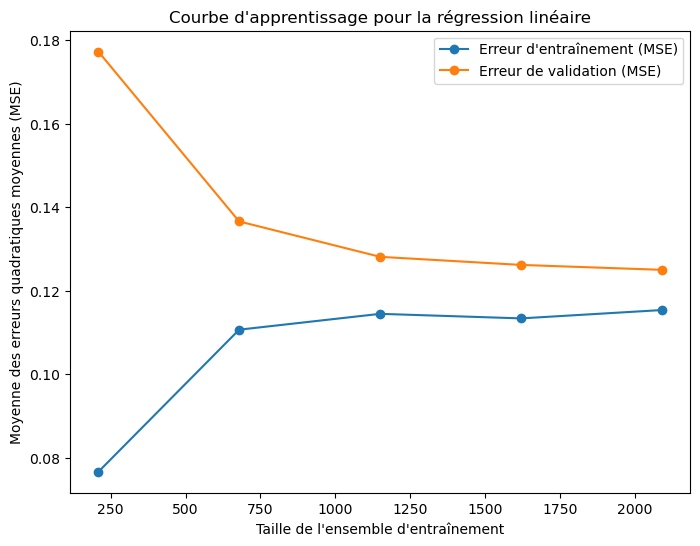

In [15]:
import matplotlib.pyplot as plt
# Tracez la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage pour la régression linéaire")
plt.plot(train_sizes, train_scores_mean, 'o-', label='Erreur d\'entraînement (MSE)')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Erreur de validation (MSE)')
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Moyenne des erreurs quadratiques moyennes (MSE)")
plt.legend(loc="best")
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
# Création d'une instance du modèle KNN avec n_neighbors fixé à 4
knn_model = KNeighborsClassifier(n_neighbors=4)
# Entraîner le modèle KNN sur les données d'entraînement
X_train_np = X_train.values
X_test_np = X_test.values
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train_np, y_train)
predictions_knn = knn_model.predict(X_test_np)

In [17]:
# Calcule de l'accuracy
accuracy_knn = accuracy_score(y_test, predictions_knn)
print("Accuracy (KNN):", accuracy_knn)
# Calcule de l'index Jaccard
jaccard_knn = jaccard_score(y_test, predictions_knn)
print("Jaccard Index (KNN):", jaccard_knn)
# Calcule du F1-Score
f1_knn = f1_score(y_test, predictions_knn)
print("F1-Score (KNN):", f1_knn)

Accuracy (KNN): 0.8183206106870229
Jaccard Index (KNN): 0.4251207729468599
F1-Score (KNN): 0.5966101694915255


In [18]:
# Calcule de la matrice de confusion
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

Confusion Matrix (KNN):
[[448  23]
 [ 96  88]]


In [19]:
# Créer une instance du modèle Decision Tree
tree_model = DecisionTreeClassifier()
# Entraîner le modèle sur l'ensemble d'entraînement
tree_model.fit(X_train, y_train)
# Prédictions sur l'ensemble de test
predictions_tree = tree_model.predict(X_test)

In [20]:
# Calcule l'accuracy
accuracy_tree = accuracy_score(y_test, predictions_tree)
print("Accuracy (Decision Tree):", accuracy_tree)
# Calcule l'index Jaccard
jaccard_tree = jaccard_score(y_test, predictions_tree)
print("Jaccard Index (Decision Tree):", jaccard_tree)
# Calcule le F1-Score
f1_tree = f1_score(y_test, predictions_tree)
print("F1-Score (Decision Tree):", f1_tree)

Accuracy (Decision Tree): 0.7633587786259542
Jaccard Index (Decision Tree): 0.4083969465648855
F1-Score (Decision Tree): 0.5799457994579945


In [21]:
# Calcule la matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, predictions_tree)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_tree)


Confusion Matrix (Decision Tree):
[[393  78]
 [ 77 107]]


In [22]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Séparer les données pour la régression logistique
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(features, Y, test_size=0.2, random_state=1)
# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement (X_train, y_train):", X_train_lr.shape, y_train_lr.shape)
print("Taille de l'ensemble de test (X_test, y_test):", X_test_lr.shape, y_test_lr.shape)


Taille de l'ensemble d'entraînement (X_train, y_train): (2616, 66) (2616,)
Taille de l'ensemble de test (X_test, y_test): (655, 66) (655,)


In [23]:
# Création d'une instance du modèle de régression logistique
LR = LogisticRegression(solver='liblinear')
# Entraîner le modèle sur l'ensemble d'entraînement
LR.fit(X_train_lr, y_train_lr)
# Prédictions sur l'ensemble de test
predictions_LR = LR.predict(X_test_lr)

In [25]:
# Calcul de l'accuracy
accuracy_LR = accuracy_score(y_test_lr, predictions_LR)
print("Accuracy (Logistic Regression):", accuracy_LR)
# Calcul de l'index Jaccard
jaccard_LR = jaccard_score(y_test_lr, predictions_LR)
print("Jaccard Index (Logistic Regression):", jaccard_LR)
# Calcul du F1-Score
f1_LR = f1_score(y_test_lr, predictions_LR)
print("F1-Score (Logistic Regression):", f1_LR)

Accuracy (Logistic Regression): 0.8366412213740458
Jaccard Index (Logistic Regression): 0.5091743119266054
F1-Score (Logistic Regression): 0.6747720364741641


In [26]:
# Calcul de la matrice de confusion
conf_matrix_LR = confusion_matrix(y_test_lr, predictions_LR)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_LR)

Confusion Matrix (Logistic Regression):
[[437  36]
 [ 71 111]]


In [27]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train)
predictions_svm = SVM.predict(X_test)

In [28]:
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Accuracy (SVM):", accuracy_svm)
jaccard_svm = jaccard_score(y_test, predictions_svm)
print("Jaccard Index (SVM):", jaccard_svm)
f1_svm = f1_score(y_test, predictions_svm)
print("F1-Score (SVM):", f1_svm)
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)

Accuracy (SVM): 0.7190839694656489
Jaccard Index (SVM): 0.0
F1-Score (SVM): 0.0


In [29]:
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

Confusion Matrix (SVM):
[[471   0]
 [184   0]]
